In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import train_test_split
from sklearn.externals import joblib
from sklearn.metrics import accuracy_score
from sknn.mlp import Classifier, Layer
from sknn import ae, mlp
import numpy as np
import pandas as pd
from time import time

In [2]:
pd.set_option('display.precision', 3) 

In [3]:
features = joblib.load("./mldata/features_1200.mat")
labels = joblib.load("./mldata/lables_1200.mat")

features = np.array(features, 'int16')
labels = np.array(labels, 'int')

t0 = time()
def scale(X, eps = 0.001):
    # scale the data points s.t the columns of the feature space
    # (i.e the predictors) are within the range [0, 1]
    return (X - np.min(X, axis = 0)) / (np.max(X, axis = 0) + eps)

features = features.astype("float32")
features = scale(features)

print "escape time : ", round(time()-t0, 3), "s"

# scale the data to the range [0, 1] and then construct the training
# and testing splits
(trainX, testX, trainY, testY) = train_test_split(features, labels, test_size = 0.1)

print "the shape of training set %s rows, %s columns" %(trainX.shape[0], trainX.shape[1])
print "the shape of test set %s rows, %s columns" %(testX.shape[0], testX.shape[1])
print "the range of training set : %s ~ %s" %(trainX.min(),trainX.max())
print "the range of test set : %s ~ %s" %(testX.min(),testX.max())

escape time :  0.086 s
the shape of training set 5400 rows, 784 columns
the shape of test set 600 rows, 784 columns
the range of training set : 0.0 ~ 0.999996
the range of test set : 0.0 ~ 0.999996


In [5]:
score1 = []
for n in range(1, 501):
    nn = Classifier(
        layers=[
            Layer("Rectifier", units=n),
            Layer("Softmax")],
        verbose=1,
        learning_rate=0.009,
        n_iter=2,
    )

    t0 = time()
    nn.fit(trainX, trainY)
    preds = nn.predict(testX)
    print "the number of unit : %s" %n
    print "accuracy score : %s" %(accuracy_score(testY, preds))
    print "escape time : ", round(time()-t0, 3), "s"
    score1.append(accuracy_score(testY, preds))

the number of unit : 1
accuracy score : 0.445
escape time :  4.582 s
the number of unit : 2
accuracy score : 0.735
escape time :  3.281 s
the number of unit : 3
accuracy score : 0.805
escape time :  3.174 s
the number of unit : 4
accuracy score : 0.848333333333
escape time :  3.781 s
the number of unit : 5
accuracy score : 0.878333333333
escape time :  3.504 s
the number of unit : 6
accuracy score : 0.866666666667
escape time :  3.462 s
the number of unit : 7
accuracy score : 0.885
escape time :  3.5 s
the number of unit : 8
accuracy score : 0.885
escape time :  3.37 s
the number of unit : 9
accuracy score : 0.893333333333
escape time :  3.534 s
the number of unit : 10
accuracy score : 0.898333333333
escape time :  3.081 s
the number of unit : 11
accuracy score : 0.89
escape time :  3.434 s
the number of unit : 12
accuracy score : 0.885
escape time :  3.725 s
the number of unit : 13
accuracy score : 0.905
escape time :  3.9 s
the number of unit : 14
accuracy score : 0.903333333333
esca

In [6]:
score2 = []
for n in range(1, 501):
    nn = Classifier(
        layers=[
            Layer("Sigmoid", units=n),
            Layer("Softmax")],
        verbose=1,
        learning_rate=0.009,
        n_iter=2,
    )

    t0 = time()
    nn.fit(trainX, trainY)
    preds = nn.predict(testX)
    print "the number of unit : %s" %n
    print "accuracy score : %s" %(accuracy_score(testY, preds))
    print "escape time : ", round(time()-t0, 3), "s"
    score2.append(accuracy_score(testY, preds))

the number of unit : 1
accuracy score : 0.226666666667
escape time :  4.472 s
the number of unit : 2
accuracy score : 0.473333333333
escape time :  3.968 s
the number of unit : 3
accuracy score : 0.49
escape time :  3.966 s
the number of unit : 4
accuracy score : 0.733333333333
escape time :  4.07 s
the number of unit : 5
accuracy score : 0.768333333333
escape time :  4.23 s
the number of unit : 6
accuracy score : 0.788333333333
escape time :  4.16 s
the number of unit : 7
accuracy score : 0.896666666667
escape time :  4.746 s
the number of unit : 8
accuracy score : 0.89
escape time :  4.693 s
the number of unit : 9
accuracy score : 0.88
escape time :  4.092 s
the number of unit : 10
accuracy score : 0.891666666667
escape time :  4.14 s
the number of unit : 11
accuracy score : 0.886666666667
escape time :  4.277 s
the number of unit : 12
accuracy score : 0.896666666667
escape time :  4.411 s
the number of unit : 13
accuracy score : 0.888333333333
escape time :  4.293 s
the number of un

In [7]:
score3 = []
for n in range(1, 501):
    nn = Classifier(
        layers=[
            Layer("Tanh", units=n),
            Layer("Softmax")],
        verbose=1,
        learning_rate=0.009,
        n_iter=2,
    )

    t0 = time()
    nn.fit(trainX, trainY)
    preds = nn.predict(testX)
    print "the number of unit : %s" %n
    print "accuracy score : %s" %(accuracy_score(testY, preds))
    print "escape time : ", round(time()-t0, 3), "s"
    score3.append(accuracy_score(testY, preds))

the number of unit : 1
accuracy score : 0.231666666667
escape time :  3.155 s
the number of unit : 2
accuracy score : 0.49
escape time :  3.209 s
the number of unit : 3
accuracy score : 0.796666666667
escape time :  3.064 s
the number of unit : 4
accuracy score : 0.896666666667
escape time :  3.079 s
the number of unit : 5
accuracy score : 0.898333333333
escape time :  3.149 s
the number of unit : 6
accuracy score : 0.895
escape time :  3.004 s
the number of unit : 7
accuracy score : 0.901666666667
escape time :  3.073 s
the number of unit : 8
accuracy score : 0.906666666667
escape time :  3.149 s
the number of unit : 9
accuracy score : 0.895
escape time :  3.247 s
the number of unit : 10
accuracy score : 0.896666666667
escape time :  3.108 s
the number of unit : 11
accuracy score : 0.891666666667
escape time :  3.133 s
the number of unit : 12
accuracy score : 0.898333333333
escape time :  3.307 s
the number of unit : 13
accuracy score : 0.895
escape time :  3.089 s
the number of unit 

In [8]:
score4 = []
for n in range(1, 501):
    nn = Classifier(
        layers=[
            Layer("Maxout", units=n, pieces=2),
            Layer("Softmax")],
        verbose=1,
        learning_rate=0.009,
        n_iter=2,
    )

    t0 = time()
    nn.fit(trainX, trainY)
    preds = nn.predict(testX)
    print "the number of unit : %s" %n
    print "accuracy score : %s" %(accuracy_score(testY, preds))
    print "escape time : ", round(time()-t0, 3), "s"
    score4.append(accuracy_score(testY, preds))

the number of unit : 1
accuracy score : 0.601666666667
escape time :  6.096 s
the number of unit : 2
accuracy score : 0.888333333333
escape time :  4.043 s
the number of unit : 3
accuracy score : 0.891666666667
escape time :  4.329 s
the number of unit : 4
accuracy score : 0.906666666667
escape time :  3.976 s
the number of unit : 5
accuracy score : 0.903333333333
escape time :  4.209 s
the number of unit : 6
accuracy score : 0.898333333333
escape time :  4.147 s
the number of unit : 7
accuracy score : 0.896666666667
escape time :  4.532 s
the number of unit : 8
accuracy score : 0.903333333333
escape time :  4.092 s
the number of unit : 9
accuracy score : 0.9
escape time :  4.222 s
the number of unit : 10
accuracy score : 0.906666666667
escape time :  4.59 s
the number of unit : 11
accuracy score : 0.906666666667
escape time :  4.396 s
the number of unit : 12
accuracy score : 0.901666666667
escape time :  4.489 s
the number of unit : 13
accuracy score : 0.9
escape time :  4.699 s
the n

In [9]:
score5 = []
for n in range(1, 501):
    nn = Classifier(
        layers=[
            Layer("Linear", units=n),
            Layer("Softmax")],
        verbose=1,
        learning_rate=0.009,
        n_iter=2,
    )

    t0 = time()
    nn.fit(trainX, trainY)
    preds = nn.predict(testX)
    print "the number of unit : %s" %n
    print "accuracy score : %s" %(accuracy_score(testY, preds))
    print "escape time : ", round(time()-t0, 3), "s"
    score5.append(accuracy_score(testY, preds))

the number of unit : 1
accuracy score : 0.62
escape time :  2.788 s
the number of unit : 2
accuracy score : 0.878333333333
escape time :  2.544 s
the number of unit : 3
accuracy score : 0.898333333333
escape time :  2.546 s
the number of unit : 4
accuracy score : 0.896666666667
escape time :  2.731 s
the number of unit : 5
accuracy score : 0.905
escape time :  2.581 s
the number of unit : 6
accuracy score : 0.905
escape time :  2.564 s
the number of unit : 7
accuracy score : 0.906666666667
escape time :  2.571 s
the number of unit : 8
accuracy score : 0.906666666667
escape time :  2.657 s
the number of unit : 9
accuracy score : 0.901666666667
escape time :  2.786 s
the number of unit : 10
accuracy score : 0.903333333333
escape time :  2.644 s
the number of unit : 11
accuracy score : 0.905
escape time :  2.711 s
the number of unit : 12
accuracy score : 0.905
escape time :  2.724 s
the number of unit : 13
accuracy score : 0.903333333333
escape time :  2.926 s
the number of unit : 14
accu

In [10]:
score6 = []
for n in range(1, 501):
    nn = Classifier(
        layers=[
            Layer("Softmax", units=n),
            Layer("Softmax")],
        verbose=1,
        learning_rate=0.009,
        n_iter=2,
    )

    t0 = time()
    nn.fit(trainX, trainY)
    preds = nn.predict(testX)
    print "the number of unit : %s" %n
    print "accuracy score : %s" %(accuracy_score(testY, preds))
    print "escape time : ", round(time()-t0, 3), "s"
    score6.append(accuracy_score(testY, preds))

the number of unit : 1
accuracy score : 0.135
escape time :  2.826 s
the number of unit : 2
accuracy score : 0.26
escape time :  2.617 s
the number of unit : 3
accuracy score : 0.343333333333
escape time :  2.788 s
the number of unit : 4
accuracy score : 0.471666666667
escape time :  2.61 s
the number of unit : 5
accuracy score : 0.451666666667
escape time :  2.625 s
the number of unit : 6
accuracy score : 0.521666666667
escape time :  2.636 s
the number of unit : 7
accuracy score : 0.478333333333
escape time :  2.63 s
the number of unit : 8
accuracy score : 0.48
escape time :  2.895 s
the number of unit : 9
accuracy score : 0.451666666667
escape time :  2.689 s
the number of unit : 10
accuracy score : 0.378333333333
escape time :  2.721 s
the number of unit : 11
accuracy score : 0.55
escape time :  2.757 s
the number of unit : 12
accuracy score : 0.588333333333
escape time :  2.742 s
the number of unit : 13
accuracy score : 0.495
escape time :  3.0 s
the number of unit : 14
accuracy s

In [11]:
score7 = []
for n in range(1, 501):
    nn = Classifier(
        layers=[
            Layer("Gaussian", units=n),
            Layer("Softmax")],
        verbose=1,
        learning_rate=0.009,
        n_iter=2,
    )

    t0 = time()
    nn.fit(trainX, trainY)
    preds = nn.predict(testX)
    print "the number of unit : %s" %n
    print "accuracy score : %s" %(accuracy_score(testY, preds))
    print "escape time : ", round(time()-t0, 3), "s"
    score7.append(accuracy_score(testY, preds))

the number of unit : 1
accuracy score : 0.62
escape time :  4.082 s
the number of unit : 2
accuracy score : 0.878333333333
escape time :  2.631 s
the number of unit : 3
accuracy score : 0.898333333333
escape time :  2.591 s
the number of unit : 4
accuracy score : 0.896666666667
escape time :  2.837 s
the number of unit : 5
accuracy score : 0.905
escape time :  2.777 s
the number of unit : 6
accuracy score : 0.905
escape time :  2.631 s
the number of unit : 7
accuracy score : 0.906666666667
escape time :  2.638 s
the number of unit : 8
accuracy score : 0.906666666667
escape time :  2.869 s
the number of unit : 9
accuracy score : 0.901666666667
escape time :  2.698 s
the number of unit : 10
accuracy score : 0.903333333333
escape time :  2.665 s
the number of unit : 11
accuracy score : 0.905
escape time :  2.706 s
the number of unit : 12
accuracy score : 0.905
escape time :  2.766 s
the number of unit : 13
accuracy score : 0.903333333333
escape time :  2.998 s
the number of unit : 14
accu

In [21]:
df = pd.DataFrame({'Rectifier' : score1,
                   'Sigmoid' : score2,
                   'Tanh' : score3,
                   'Maxout' : score4,
                   'Linear' : score5,
                   'Softmax' : score6,
                   'Gaussian' : score7}, index=range(1, 501))

In [28]:
df.head(5)

,Gaussian,Linear,Maxout,Rectifier,Sigmoid,Softmax,Tanh
1,0.62,0.62,0.60,0.45,0.23,0.14,0.23
2,0.88,0.88,0.89,0.73,0.47,0.26,0.49
3,0.90,0.90,0.89,0.81,0.49,0.34,0.80
4,0.90,0.90,0.91,0.85,0.73,0.47,0.90
5,0.91,0.91,0.90,0.88,0.77,0.45,0.90


In [37]:
df.describe()

,Gaussian,Linear,Maxout,Rectifier,Sigmoid,Softmax,Tanh
count,500.00,500.00,500.00,500.00,500.00,500.00,500.00
mean,0.90,0.90,0.90,0.90,0.90,0.39,0.90
std,0.01,0.01,0.01,0.02,0.04,0.09,0.04
min,0.62,0.62,0.60,0.45,0.23,0.14,0.23
25%,0.90,0.90,0.90,0.90,0.90,0.34,0.90
50%,0.90,0.90,0.90,0.91,0.90,0.38,0.90
75%,0.91,0.91,0.90,0.91,0.90,0.45,0.90
max,0.91,0.91,0.91,0.92,0.91,0.66,0.91


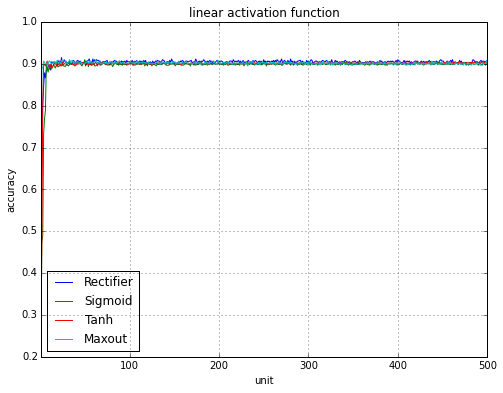

In [48]:
df[['Rectifier', 'Sigmoid', 'Tanh', 'Maxout']].plot(title='linear activation function', figsize=(8,6))
plt.xlabel('unit')
plt.ylabel('accuracy')

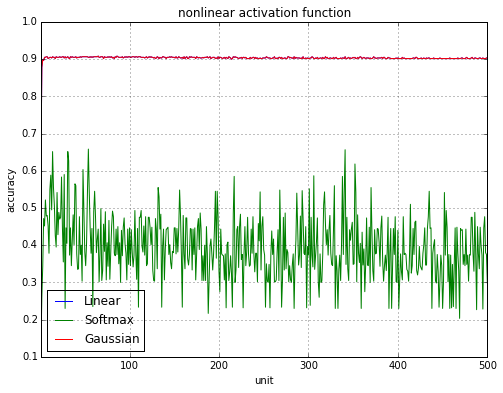

In [47]:
df[['Linear', 'Softmax', 'Gaussian']].plot(title='nonlinear activation function', figsize=(8,6))
plt.xlabel('unit')
plt.ylabel('accuracy')